# Objective:-  To create an employee cluster to show absenteeism at work and try to identify the top contributors for it


## importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=40

In [2]:
df=pd.read_csv(r'C:\Users\Naveen\Downloads\DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv',sep=';')

In [3]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [4]:
z=df.columns

In [5]:
for i in z:
    d=i.split(';')
print(d)

['Absenteeism time in hours']


In [6]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [7]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [9]:
#df.drop(columns='ID',inplace=True)

In [10]:
for cols in list(z):
  print(round(df[cols].value_counts()))
  print("----------------------")

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
9       8
6       8
23      8
27      7
12      7
30      7
2       6
7       6
26      5
32      5
29      5
19      3
21      3
31      3
8       2
16      2
4       1
35      1
Name: ID, dtype: int64
----------------------
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64
----------------------
3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64
----------------------
2    161
4    156
3    154
6    144
5    125
Name: Day of the week, dtype: 

# checking unique values for each columns:-

In [11]:
df['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [12]:
df['Month of absence'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  0], dtype=int64)

In [13]:
df['Day of the week'].unique()

array([3, 4, 5, 6, 2], dtype=int64)

In [14]:
df['Seasons'].unique()

array([1, 4, 2, 3], dtype=int64)

In [15]:
df['Transportation expense'].unique()

array([289, 118, 179, 279, 361, 260, 155, 235, 246, 189, 248, 330, 157,
       291, 184, 225, 369, 388, 378, 228, 300, 268, 231, 233], dtype=int64)

In [16]:
df['Distance from Residence to Work'].unique()

array([36, 13, 51,  5, 52, 50, 12, 11, 25, 29, 16, 27, 42, 10, 20, 31, 26,
       17, 22, 15, 49, 48, 14, 35, 45], dtype=int64)

In [17]:
df['Service time'].unique()

array([13, 18, 14,  3, 11, 16,  4,  6, 12,  7, 10,  9, 17, 29,  8,  1, 15,
       24], dtype=int64)

In [18]:
df['Work load Average/day '].unique()

array([239.554, 205.917, 241.476, 253.465, 306.345, 261.306, 308.593,
       302.585, 343.253, 326.452, 378.884, 377.55 , 275.312, 265.615,
       294.217, 265.017, 284.031, 236.629, 330.061, 251.818, 244.387,
       239.409, 246.074, 253.957, 230.29 , 249.797, 261.756, 284.853,
       268.519, 280.549, 313.532, 264.249, 222.196, 246.288, 237.656,
       275.089, 264.604, 271.219])

In [19]:
df['Age'].unique()

array([33, 50, 38, 39, 28, 36, 34, 37, 41, 47, 29, 48, 32, 27, 43, 40, 31,
       30, 49, 58, 46, 53], dtype=int64)

In [20]:
df['Hit target'].unique()

array([ 97,  92,  93,  95,  99,  96,  94,  98,  81,  88, 100,  87,  91],
      dtype=int64)

In [21]:
df['Disciplinary failure'].unique()

array([0, 1], dtype=int64)

In [22]:
df['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [23]:
df['Son'].unique()

array([2, 1, 0, 4, 3], dtype=int64)

In [24]:
df['Social drinker'].unique()

array([1, 0], dtype=int64)

In [25]:
df['Social smoker'].unique()

array([0, 1], dtype=int64)

In [26]:
df['Pet'].unique()

array([1, 0, 4, 2, 5, 8], dtype=int64)

In [27]:
df['Pet'].value_counts()

0    460
1    138
2     96
4     32
8      8
5      6
Name: Pet, dtype: int64

In [28]:
df['Weight'].unique()

array([ 90,  98,  89,  68,  80,  65,  95,  88,  67,  69,  86,  84,  75,
        58,  83, 106,  73,  70,  56,  63,  76, 108,  77,  79, 100,  94],
      dtype=int64)

In [29]:
df['Height'].unique()

array([172, 178, 170, 168, 196, 167, 165, 182, 185, 163, 169, 171, 174,
       175], dtype=int64)

In [30]:
df['Body mass index'].unique()

array([30, 31, 24, 27, 23, 25, 29, 32, 22, 33, 21, 28, 38, 19, 36, 35, 34],
      dtype=int64)

In [31]:
df['Absenteeism time in hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48], dtype=int64)

In [32]:
df['Absenteeism time in hours'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
5        7
40       7
32       6
64       3
80       3
120      3
56       2
112      2
7        1
104      1
48       1
Name: Absenteeism time in hours, dtype: int64

In [33]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [34]:
df.drop(columns='ID',inplace=True)

## finaly we find there is no null values and no noise data

# univariate visualization

<AxesSubplot:xlabel='Reason for absence', ylabel='Count'>

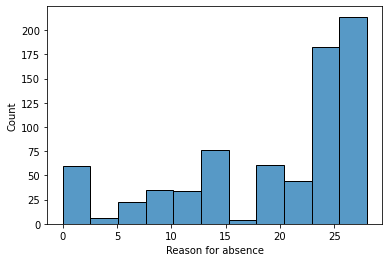

In [35]:
sb.histplot(data=df,x='Reason for absence',)

## Greater than 25 reason of absence is greater than 200

<AxesSubplot:xlabel='Month of absence', ylabel='Count'>

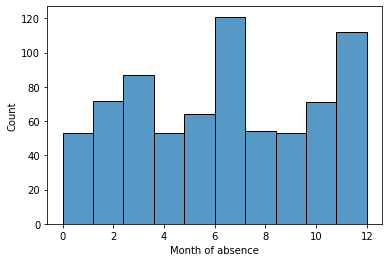

In [36]:
sb.histplot(data=df,x='Month of absence',bins=10)

<AxesSubplot:xlabel='Day of the week', ylabel='Count'>

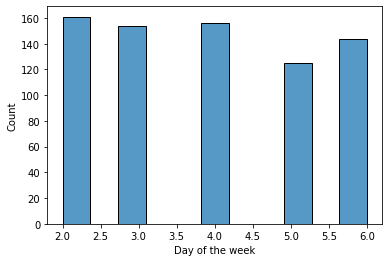

In [37]:
sb.histplot(data=df,x='Day of the week')

<AxesSubplot:xlabel='Seasons', ylabel='Count'>

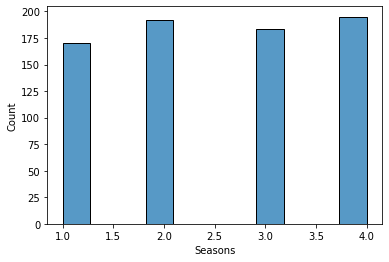

In [38]:
sb.histplot(data=df,x='Seasons')

<AxesSubplot:xlabel='Seasons'>

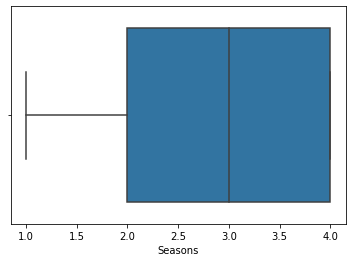

In [39]:
sb.boxplot(data=df,x='Seasons')

<AxesSubplot:xlabel='Transportation expense'>

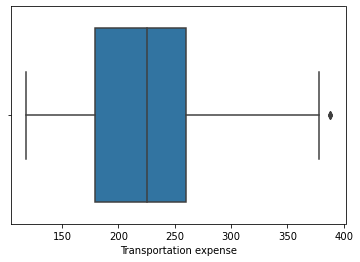

In [40]:
sb.boxplot(data=df,x='Transportation expense')

In [41]:
# according to graph it has outlier but we cant say anthing according to domain knowledge or it is possible that it comes from far

<AxesSubplot:xlabel='Transportation expense', ylabel='Density'>

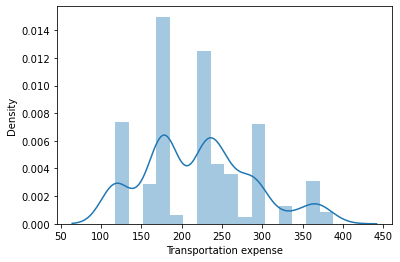

In [42]:
sb.distplot(a=df['Transportation expense'])

<AxesSubplot:xlabel='Distance from Residence to Work', ylabel='Density'>

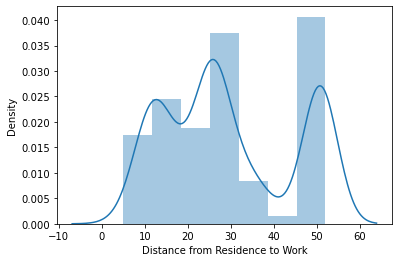

In [43]:
sb.distplot(a=df['Distance from Residence to Work'])

<AxesSubplot:xlabel='Service time', ylabel='Density'>

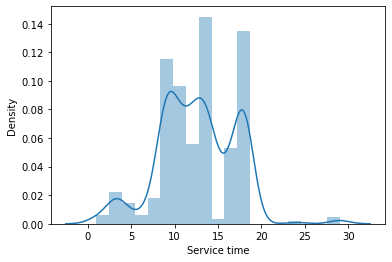

In [44]:
sb.distplot(a=df['Service time'])


<AxesSubplot:xlabel='Service time'>

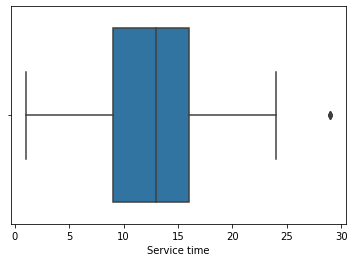

In [45]:
sb.boxplot(data=df,x='Service time')

### it has outliers

<AxesSubplot:xlabel='Age', ylabel='Count'>

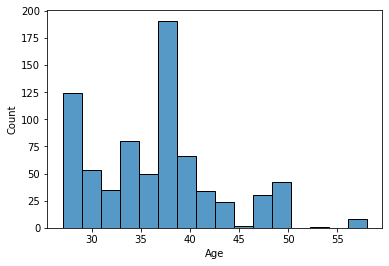

In [46]:
sb.histplot(data=df,x='Age')

### age 37 and 38 employees are more 

<AxesSubplot:xlabel='Work load Average/day '>

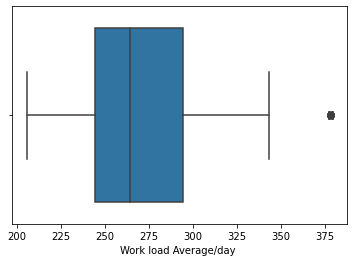

In [47]:
sb.boxplot(data=df,x='Work load Average/day ')

### one outliers are in this he is working more according to the others

<AxesSubplot:xlabel='Hit target', ylabel='Count'>

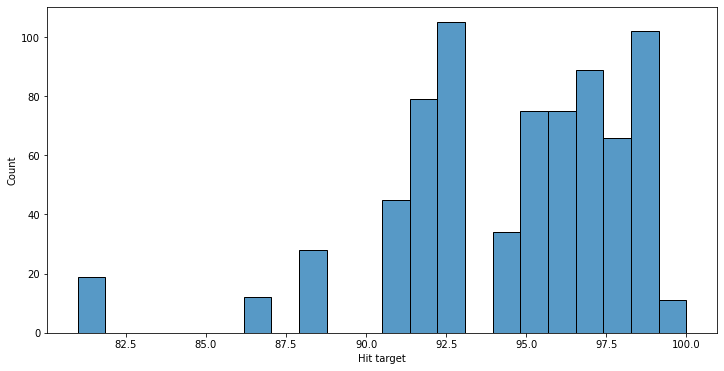

In [48]:
pt.figure(figsize=(12,6))
sb.histplot(data=df,x='Hit target')

<AxesSubplot:xlabel='Education', ylabel='Count'>

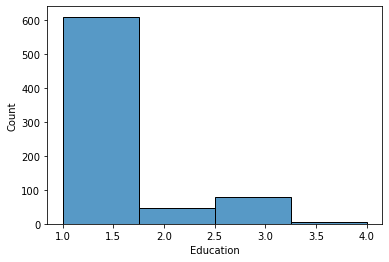

In [49]:
sb.histplot(data=df,x='Education',bins=4)

<AxesSubplot:xlabel='Disciplinary failure', ylabel='Density'>

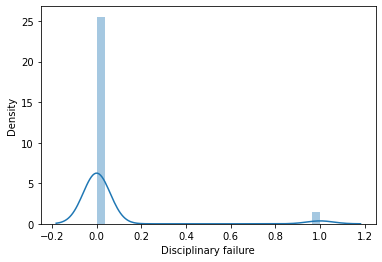

In [50]:
sb.distplot(a=df['Disciplinary failure'],)

<AxesSubplot:xlabel='Son', ylabel='Count'>

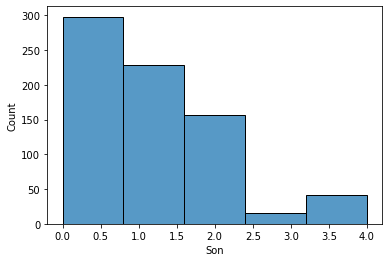

In [51]:
sb.histplot(data=df,x='Son',bins=5)

<AxesSubplot:xlabel='Social drinker', ylabel='Count'>

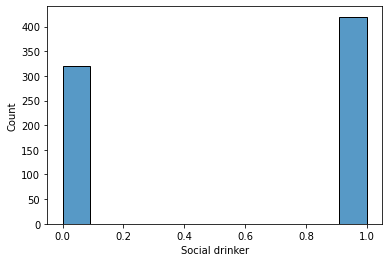

In [52]:
sb.histplot(data=df,x='Social drinker')

<AxesSubplot:xlabel='Social smoker', ylabel='Count'>

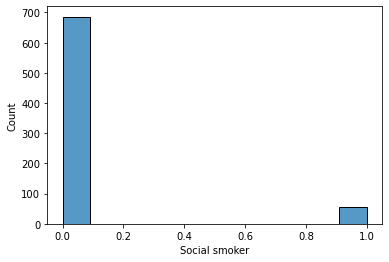

In [53]:
sb.histplot(data=df,x='Social smoker')

<AxesSubplot:xlabel='Pet', ylabel='Count'>

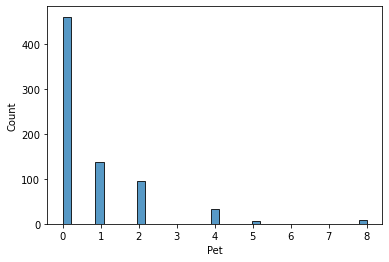

In [54]:
sb.histplot(data=df,x='Pet')

<AxesSubplot:xlabel='Weight', ylabel='Count'>

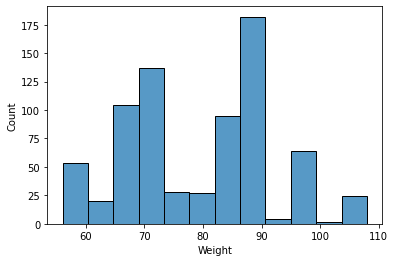

In [55]:
sb.histplot(data=df,x='Weight')

<AxesSubplot:xlabel='Height', ylabel='Count'>

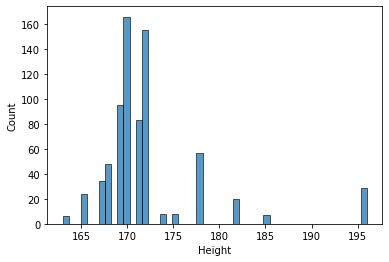

In [56]:
sb.histplot(data=df,x='Height')

<AxesSubplot:xlabel='Body mass index', ylabel='Count'>

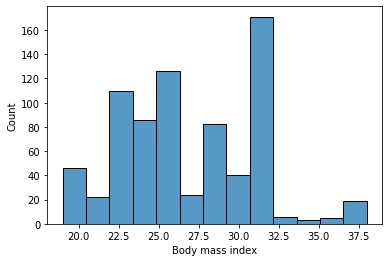

In [57]:
sb.histplot(data=df,x='Body mass index')

<AxesSubplot:xlabel='Absenteeism time in hours', ylabel='Count'>

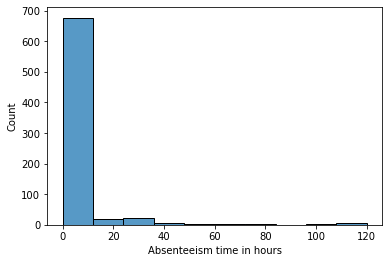

In [58]:
sb.histplot(data=df,x='Absenteeism time in hours',bins=10)

<AxesSubplot:xlabel='Education', ylabel='Count'>

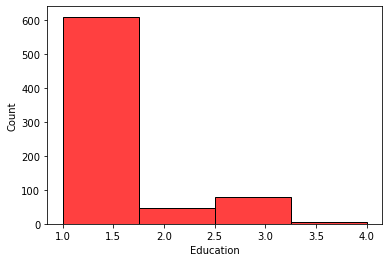

In [59]:
sb.histplot(data=df,x='Education',bins=4,color='red')

In [60]:
df.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

# bivariate analysis or visualization

<AxesSubplot:xlabel='Reason for absence', ylabel='Month of absence'>

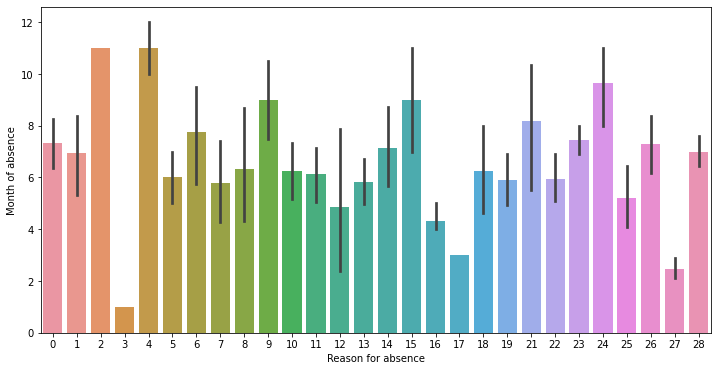

In [61]:
pt.figure(figsize=(12,6))
sb.barplot(data=df,x='Reason for absence',y='Month of absence')

## here we can see 2 and 4 reason of absence is high according to month absence.

<AxesSubplot:xlabel='Age', ylabel='Work load Average/day '>

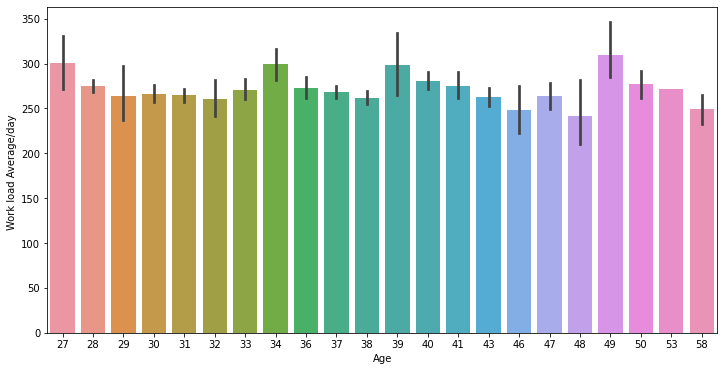

In [62]:
pt.figure(figsize=(12,6))
sb.barplot(data=df,x='Age',y='Work load Average/day ')

## here age of 49 have high workload and after that 27,34,39

<AxesSubplot:xlabel='Age', ylabel='Disciplinary failure'>

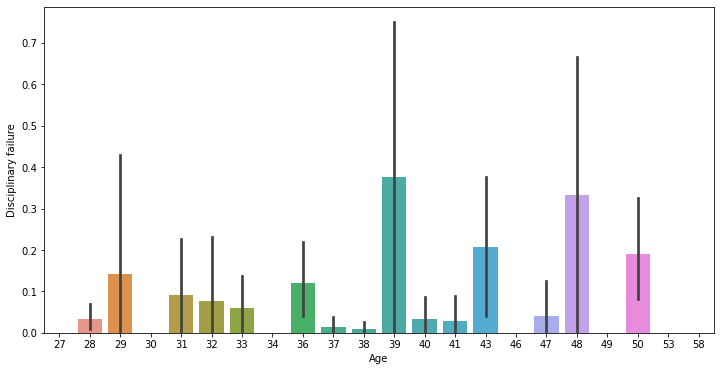

In [63]:
pt.figure(figsize=(12,6))
sb.barplot(data=df,x='Age',y='Disciplinary failure')

## according to age wise age near about 39 and 48 has higher number of disciplinary failure

<AxesSubplot:xlabel='Month of absence', ylabel='Transportation expense'>

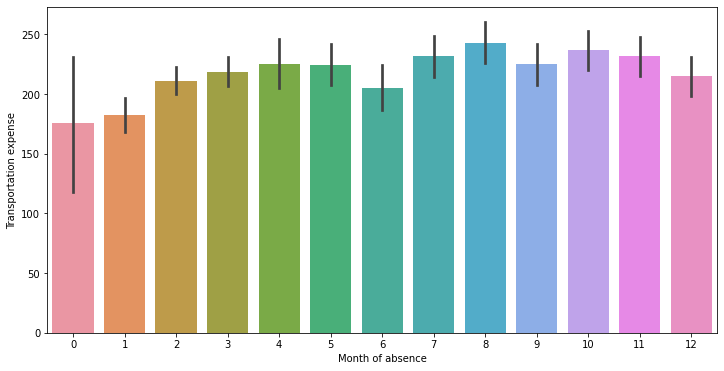

In [64]:
pt.figure(figsize=(12,6))
sb.barplot(data=df,x='Month of absence',y='Transportation expense')

## Transportation expense is about 250 and the month of absence is 8

<AxesSubplot:xlabel='Month of absence', ylabel='Distance from Residence to Work'>

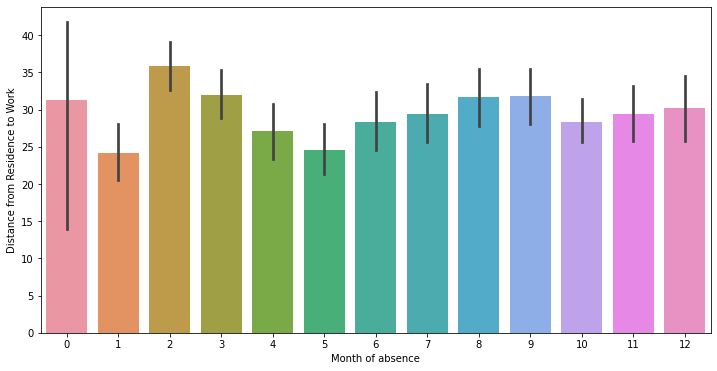

In [65]:
pt.figure(figsize=(12,6))
sb.barplot(data=df,x='Month of absence',y='Distance from Residence to Work')

## here the graph between Distance from Residence to Work and according to that month of absence so we can see distance is near to 30 has higher number of absence

<AxesSubplot:xlabel='Age', ylabel='Absenteeism time in hours'>

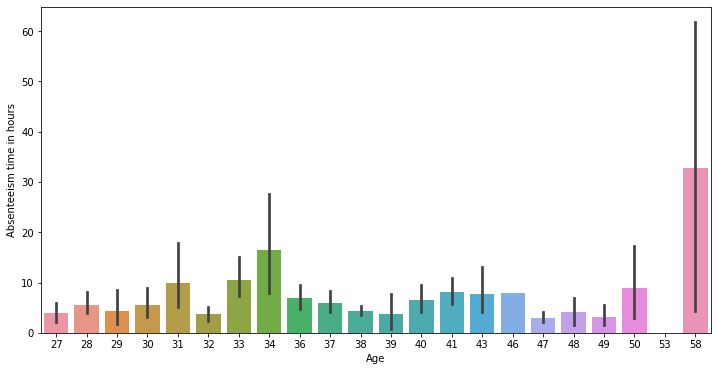

In [66]:
pt.figure(figsize=(12,6))
sb.barplot(data=df,x='Age',y='Absenteeism time in hours')

## Absenteeism time in hours is more at the age of 58

<AxesSubplot:xlabel='Day of the week', ylabel='Absenteeism time in hours'>

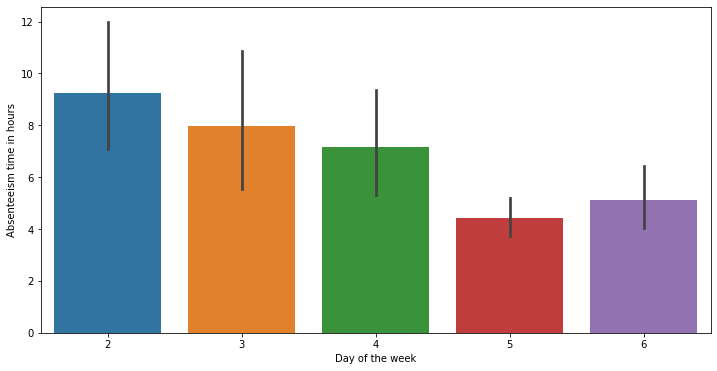

In [67]:
pt.figure(figsize=(12,6))
sb.barplot(data=df,x='Day of the week',y='Absenteeism time in hours')

## 2 day of the week  has higher absence time in hour it is upto 9 hour

<AxesSubplot:xlabel='Age', ylabel='Reason for absence'>

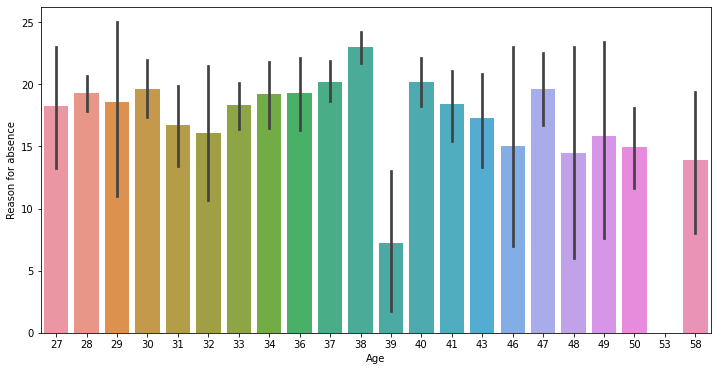

In [68]:
pt.figure(figsize=(12,6))
sb.barplot(data=df,x='Age',y='Reason for absence')

# at age 38 the reason of absence is near about 23

<AxesSubplot:xlabel='Reason for absence', ylabel='Work load Average/day '>

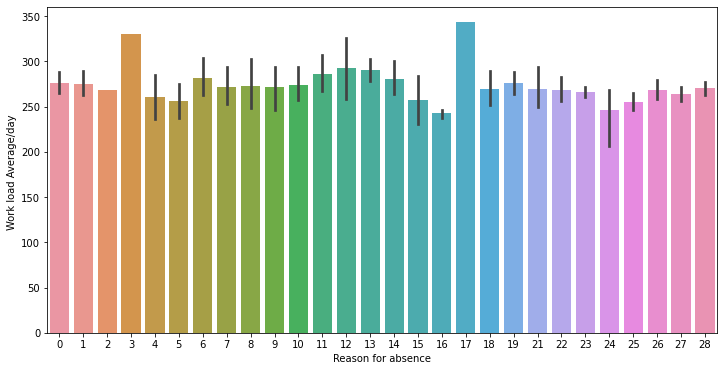

In [69]:
pt.figure(figsize=(12,6))
sb.barplot(data=df,x='Reason for absence',y='Work load Average/day ')

# conclusion:- work load average per day is near about 340 and the reason of absence is 17

In [70]:
Reason for absence

SyntaxError: invalid syntax (4044357025.py, line 1)

In [71]:
corr=df.corr()

<AxesSubplot:>

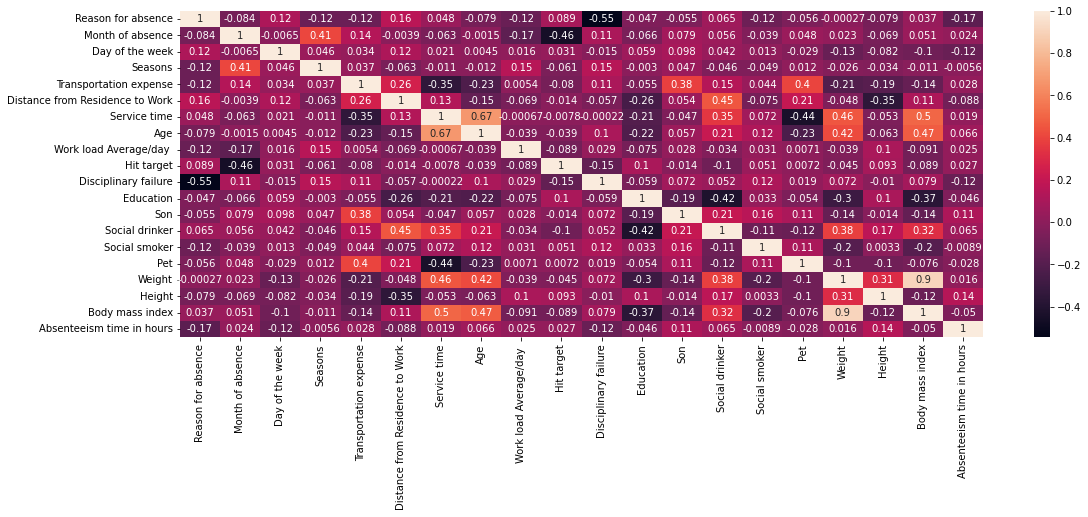

In [72]:
pt.figure(figsize=(18,6))
sb.heatmap(corr,annot=True)

### Disciplinary Failure is highly correlated 55%
### day of the weak is postive correlated 12%
### Distance from residance is high positive correlated 16% 

# Feature scaling

In [73]:
df1=df.copy()

In [74]:
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [76]:
# defining method to perform data scaling operation based on the type of scaling 
def feature_scale(scale):
  numerics=['int16','int32','int64','float16','float32','float64']
  new_df=df.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler= MinMaxScaler()
  else:
    scaler=StandardScaler()
  df_scaled=pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
  return df_scaled

In [77]:
# scaling data using minmax scaling process
scale='minmax'
scaled_df=feature_scale(scale)
scaled_df.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [78]:
scaled_df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.928571,0.583333,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333
1,0.000000,0.583333,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000
2,0.821429,0.583333,0.50,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667
3,0.250000,0.583333,0.75,0.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333
4,0.821429,0.583333,0.75,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667


# Dimensioned reduction algorithms
## Principal Component Analysis (PCA)

In [79]:
# here we are taking teh all features for PCA
X=scaled_df.copy()

In [80]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# PCA
pca=PCA(n_components=2)
df_red=pca.fit(X).transform(X)
explained_variance = pca.explained_variance_ratio_
explained_variance 

array([0.22278234, 0.12283927])

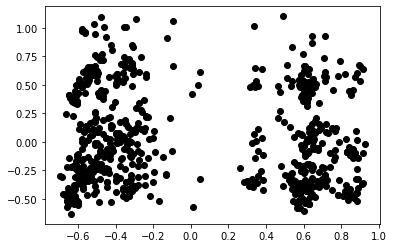

In [82]:
pt.scatter(df_red[:,0], df_red[:,1],c='black')
pt.show()

# kmean algorithm for all

In [83]:
from sklearn.cluster import KMeans

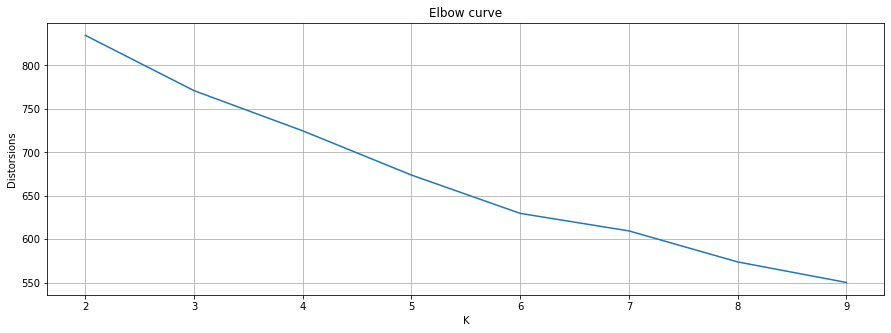

In [84]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    distorsions.append(kmeans.inertia_)

fig = pt.figure(figsize=(15, 5))
pt.plot(range(2, 10), distorsions)
pt.grid(True)
pt.xlabel('K')
pt.ylabel('Distorsions')
pt.title('Elbow curve');

In [85]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df)

    silhouette_avg = silhouette_score(df, cluster_labels) # silhoutte score
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.03991256082126004
For n_clusters = 3 The average silhouette_score is : 0.1163515496126651
For n_clusters = 4 The average silhouette_score is : 0.08562405119032515
For n_clusters = 5 The average silhouette_score is : 0.0801350585196793
For n_clusters = 6 The average silhouette_score is : -0.021491406679539197
For n_clusters = 7 The average silhouette_score is : -0.005844044871192506
For n_clusters = 8 The average silhouette_score is : 0.04293741900718365
For n_clusters = 9 The average silhouette_score is : -0.03249542399359681
For n_clusters = 10 The average silhouette_score is : -0.007962748716794393
For n_clusters = 11 The average silhouette_score is : -0.05906527821728648
For n_clusters = 12 The average silhouette_score is : -0.051654616731213375
For n_clusters = 13 The average silhouette_score is : -0.050021571403402826
For n_clusters = 14 The average silhouette_score is : -0.05273788088968909
For n_clusters = 15 The average sil

In [86]:
Kmeans1=KMeans(n_clusters=3)
Kmeans1.fit(scaled_df)

KMeans(n_clusters=3)

In [87]:
from sklearn.metrics import silhouette_score

In [88]:
score_2=silhouette_score(scaled_df,Kmeans1.labels_)
print('silhouette score of orginal data   ===>',score_2)

silhouette score of orginal data   ===> 0.1707420980394835


# Kmeans Algorithm for reducing dimensions of PCA

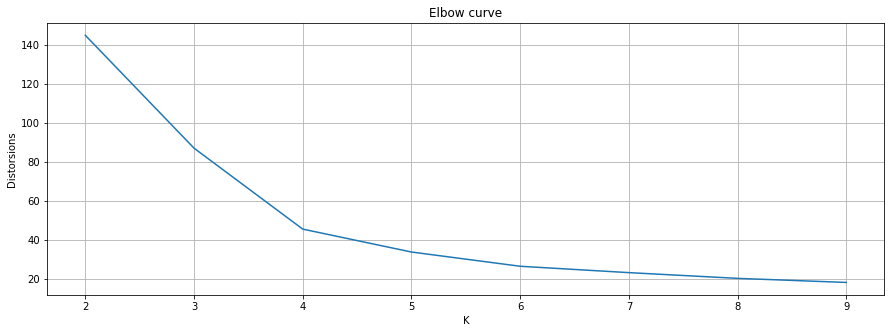

In [89]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_red)
    distorsions.append(kmeans.inertia_)

fig = pt.figure(figsize=(15, 5))
pt.plot(range(2, 10), distorsions)
pt.grid(True)
pt.xlabel('K')
pt.ylabel('Distorsions')
pt.title('Elbow curve');

## here we can clearly see the elbow on point 4

In [90]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_red)

    silhouette_avg = silhouette_score(df, cluster_labels) # silhoutte score
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.04273506267636326
For n_clusters = 3 The average silhouette_score is : 0.016645550016857417
For n_clusters = 4 The average silhouette_score is : -0.03052254001165086
For n_clusters = 5 The average silhouette_score is : -0.03237437873300538
For n_clusters = 6 The average silhouette_score is : -0.042300423587423634
For n_clusters = 7 The average silhouette_score is : -0.058695758493170304
For n_clusters = 8 The average silhouette_score is : -0.05322004164578861
For n_clusters = 9 The average silhouette_score is : -0.07256991598116293
For n_clusters = 10 The average silhouette_score is : -0.09870530819954516
For n_clusters = 11 The average silhouette_score is : -0.10384015383017581
For n_clusters = 12 The average silhouette_score is : -0.12546143231066612
For n_clusters = 13 The average silhouette_score is : -0.12171000078288322
For n_clusters = 14 The average silhouette_score is : -0.1527573289330222
For n_clusters = 15 The average s

# For n_clusters = 2 The average silhouette_score is : 4%

In [91]:
#Model building
Kmeans_r = KMeans(n_clusters=2)
Kmeans_r.fit(df_red)

KMeans(n_clusters=2)

In [92]:
score3=silhouette_score(df_red,Kmeans_r.labels_)
print('silhouette score  ===> ',score3)

silhouette score  ===>  0.5729937799126534


Text(0.5, 1.0, 'PCA')

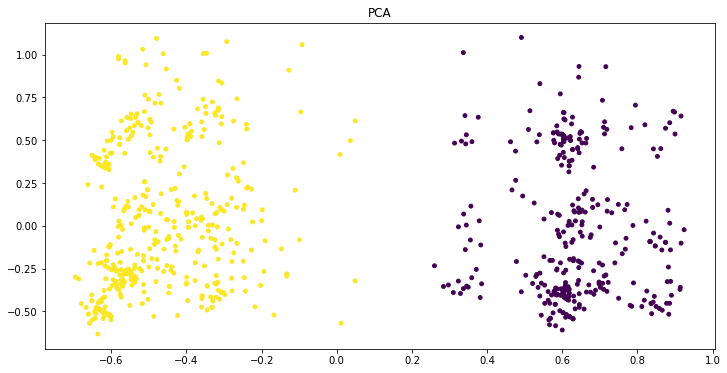

In [94]:
pt.figure(figsize=(12,6))
pt.scatter(df_red[:,0],df_red[:,1],c=Kmeans_r.labels_,s=15)
pt.title("PCA")

## conclusion: here we can't conclude outliers it is taking all the data points under cluster.
## it is not able to detect outliers

In [95]:
# Silhouette scores:
print("for all features =",score_2)
print("Reduction Silhouette score(PCA) =",score3)

for all features = 0.1707420980394835
Reduction Silhouette score(PCA) = 0.5729937799126534


# Agglomerative Hierarchical algorithm

# for all features

In [96]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

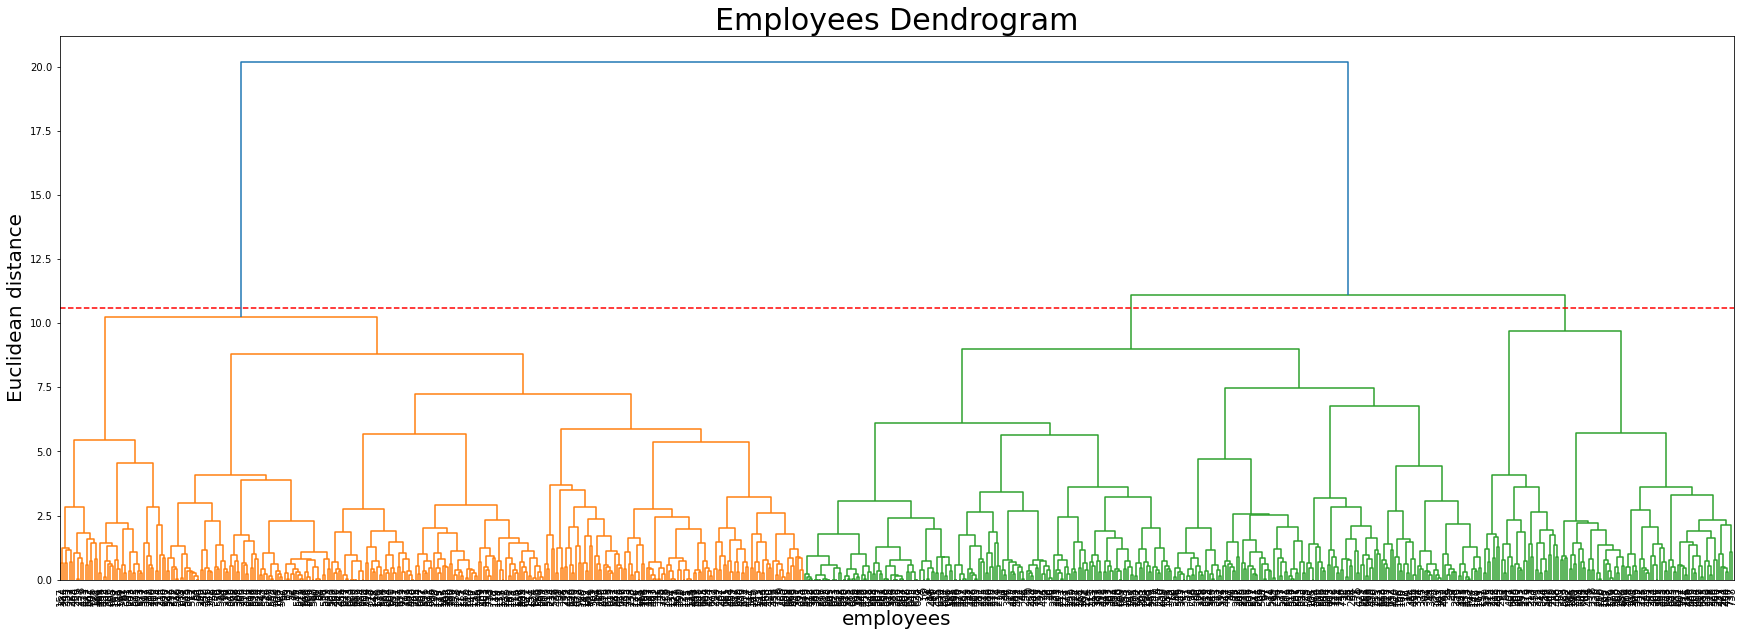

In [97]:
pt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(scaled_df, method = 'ward'),labels=scaled_df.index)# scipy cluster
pt.axhline(y=10.6, color='r', linestyle='--') # for cuuting line
ax = pt.gca()# use to create current polar axis on current figure
ax.tick_params(axis='x', which='major', labelsize=10)
pt.title('Employees Dendrogram',fontsize=30)
pt.xlabel('employees',fontsize=20)
pt.ylabel('Euclidean distance', fontsize=20)
pt.show()

## n_cluster =2 because intead of that we can't see no longer vertical line without that

In [98]:
# Model building
HC = AgglomerativeClustering(n_clusters=2)
HC.fit(scaled_df)

AgglomerativeClustering()

In [99]:
A_S=silhouette_score(scaled_df,HC.labels_)
print('without redused  dimensions silhouette scotre ===>',A_S)

without redused  dimensions silhouette scotre ===> 0.19795516707635724


# for reduced pca

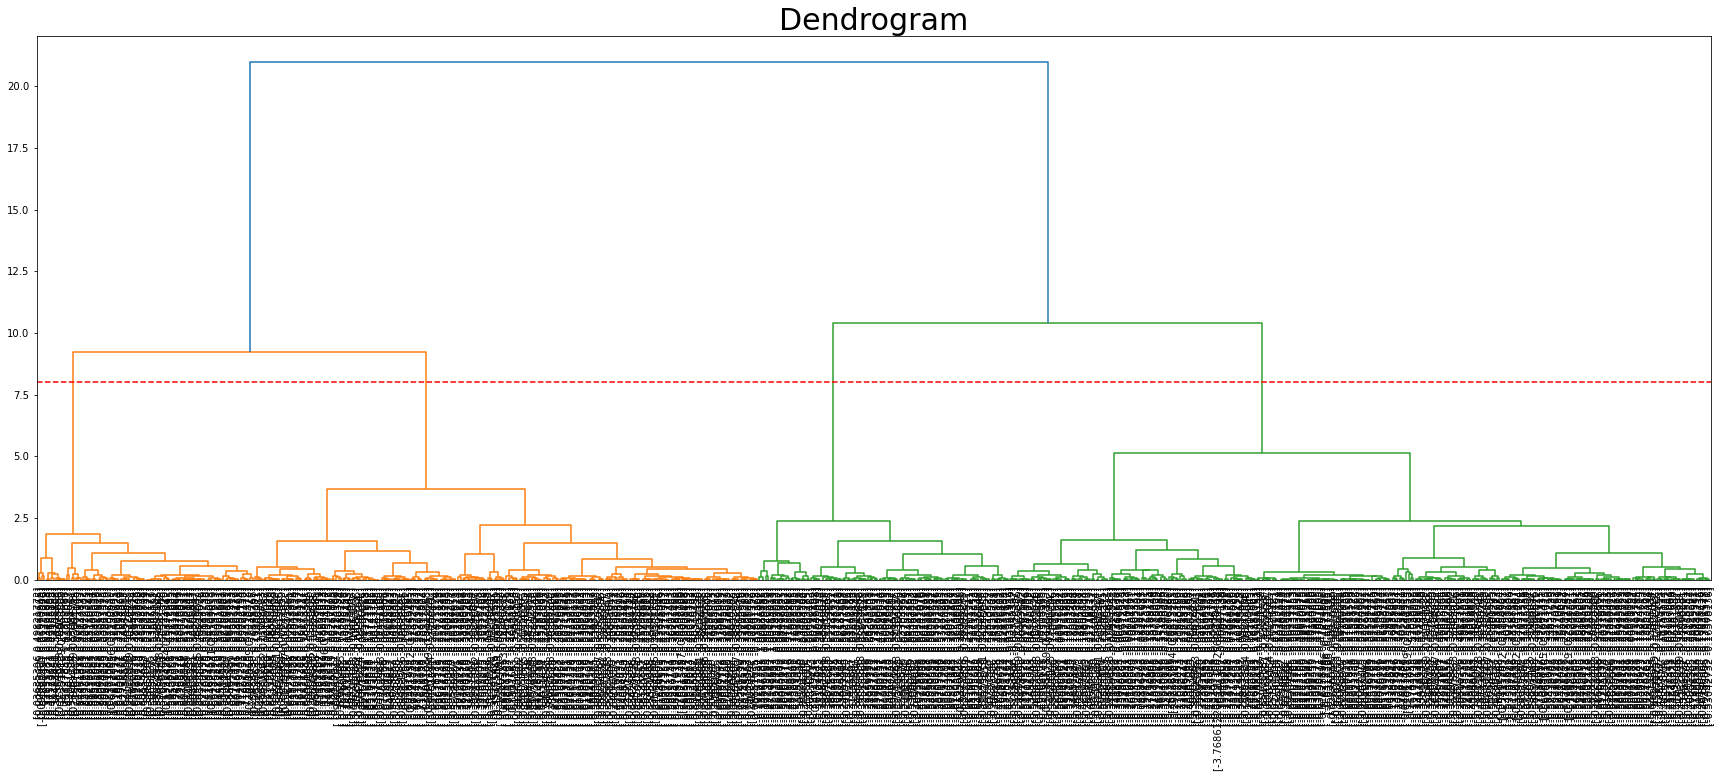

In [101]:
# PCA
pt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df_red, method = 'ward'),labels=df_red)
pt.axhline(y=8, color='r', linestyle='--')
ax = pt.gca()# used to create current polar axis on current figure
ax.tick_params(axis='x', which='major', labelsize=10)
pt.title('Dendrogram',fontsize=30)

pt.show()


In [102]:
# n_cluster =4

In [104]:
# Model Building
HC_r_pca = AgglomerativeClustering(n_clusters=4)
HC_r_pca.fit(df_red)

AgglomerativeClustering(n_clusters=4)

In [106]:
Hc_R_S=silhouette_score(df_red,HC_r_pca.labels_)
print('silhouette score of redused dimesioned data  ===> ',Hc_R_S)

silhouette score of redused dimesioned data  ===>  0.5789614129487106


#  dbscan

In [107]:
 from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [114]:
# for whole data
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(scaled_df)
distances, indices = nbrs.kneighbors(scaled_df)

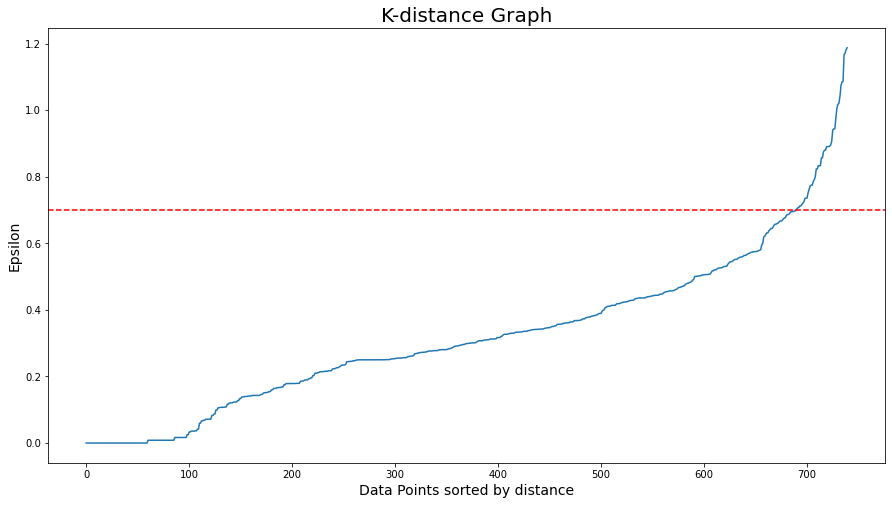

In [115]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
pt.figure(figsize=(15,8))
pt.plot(distances)
pt.axhline(y=0.7, color='r', linestyle='--')
pt.title('K-distance Graph',fontsize=20)
pt.xlabel('Data Points sorted by distance',fontsize=14)
pt.ylabel('Epsilon',fontsize=14)
pt.show()

## here the k distance is 0.7 after that point it is increasing sharply

In [117]:
eps=0.77
for min_samples in [3,4,5,6,7,8,9,10,11,12,13,14,15]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(scaled_df)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)
    print('-'*100)


eps= 0.77 | min_samples=  3 | obtained clustering:  [(1, 57), (2, 114), (3, 111), (4, 4), (5, 22), (6, 39), (7, 26), (8, 94), (9, 112), (10, 6), (11, 4), (12, 55), (13, 12), (14, 4), (15, 10), (16, 20), (17, 28), (18, 4), (19, 5), (20, 3), (21, 4), (22, 6)]
----------------------------------------------------------------------------------------------------
eps= 0.77 | min_samples=  4 | obtained clustering:  [(1, 66), (2, 114), (3, 111), (4, 4), (5, 22), (6, 39), (7, 26), (8, 93), (9, 112), (10, 5), (11, 55), (12, 12), (13, 4), (14, 6), (15, 28), (16, 20), (17, 4), (18, 5), (19, 4), (20, 4), (21, 6)]
----------------------------------------------------------------------------------------------------
eps= 0.77 | min_samples=  5 | obtained clustering:  [(1, 98), (2, 111), (3, 111), (4, 22), (5, 38), (6, 26), (7, 93), (8, 110), (9, 55), (10, 12), (11, 6), (12, 28), (13, 20), (14, 4), (15, 6)]
--------------------------------------------------------------------------------------------------

## after min sample 13 it is going to constant so we can take 13 min samples

In [118]:
dbscan_opt=DBSCAN(eps=0.77,min_samples=13)
dbscan_opt.fit(scaled_df)

DBSCAN(eps=0.77, min_samples=13)

In [119]:
scaled_df['DBSCAN_opt_labels']=dbscan_opt.labels_
scaled_df['DBSCAN_opt_labels'].value_counts()

-1    248
 1    111
 0    106
 3     91
 5     60
 4     54
 2     32
 6     21
 7     17
Name: DBSCAN_opt_labels, dtype: int64

In [120]:
score4=round(silhouette_score(scaled_df, scaled_df['DBSCAN_opt_labels'])*100,2)
score4

29.07

In [122]:
from sklearn import metrics

In [123]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(scaled_df, scaled_df['DBSCAN_opt_labels']))

Silhouette Coefficient: 0.291


In [126]:
# for dimension reduced data.
neigh1 = NearestNeighbors(n_neighbors=4)
nbrs1 = neigh.fit(df_red)
distances1, indices1 = nbrs.kneighbors(df_red)

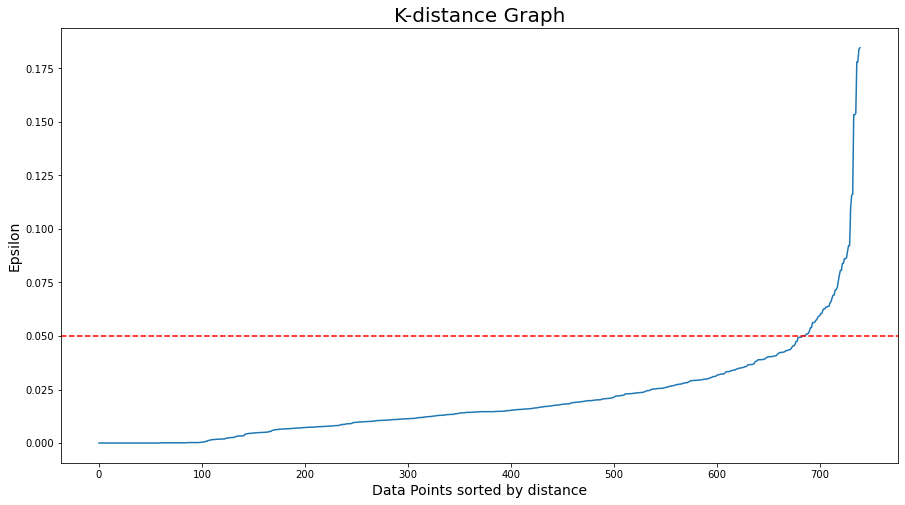

In [130]:
# Plotting K-distance Graph
distances1 = np.sort(distances1, axis=0)
distances = distances1[:,1]
pt.figure(figsize=(15,8))
pt.plot(distances)
pt.axhline(y=0.05, color='r', linestyle='--')
pt.title('K-distance Graph',fontsize=20)
pt.xlabel('Data Points sorted by distance',fontsize=14)
pt.ylabel('Epsilon',fontsize=14)
pt.show()

In [133]:
eps=0.05
for min_samples in [3,4,5,6,7,8,9,10,11,12,13,14,15]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df_red)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)
    print('-'*100)


eps= 0.05 | min_samples=  3 | obtained clustering:  [(1, 85), (2, 273), (3, 107), (4, 10), (5, 13), (6, 56), (7, 21), (8, 5), (9, 29), (10, 3), (11, 4), (12, 15), (13, 5), (14, 6), (15, 43), (16, 21), (17, 4), (18, 8), (19, 4), (20, 6), (21, 3), (22, 3), (23, 13), (24, 3)]
----------------------------------------------------------------------------------------------------
eps= 0.05 | min_samples=  4 | obtained clustering:  [(1, 108), (2, 270), (3, 107), (4, 10), (5, 13), (6, 56), (7, 21), (8, 5), (9, 29), (10, 4), (11, 14), (12, 6), (13, 43), (14, 18), (15, 7), (16, 4), (17, 4), (18, 5), (19, 13), (20, 3)]
----------------------------------------------------------------------------------------------------
eps= 0.05 | min_samples=  5 | obtained clustering:  [(1, 133), (2, 255), (3, 107), (4, 10), (5, 13), (6, 56), (7, 21), (8, 29), (9, 5), (10, 13), (11, 18), (12, 42), (13, 9), (14, 5), (15, 6), (16, 5), (17, 13)]
-------------------------------------------------------------------------

In [134]:
b=pd.DataFrame(df_red)

In [136]:
dbscan_opt2=DBSCAN(eps=0.05,min_samples=5)
dbscan_opt2.fit(df_red)

DBSCAN(eps=0.05)

In [138]:
b['DBSCAN_opt_labels']=dbscan_opt2.labels_
b['DBSCAN_opt_labels'].value_countsnts()

 0     255
-1     133
 1     107
 4      56
 10     42
 6      29
 5      21
 9      18
 3      13
 8      13
 15     13
 2      10
 11      9
 13      6
 7       5
 14      5
 12      5
Name: DBSCAN_opt_labels, dtype: int64

In [139]:
score6=round(silhouette_score(b, b['DBSCAN_opt_labels'])*100,2)
score6

77.11

Silhouette Coefficient: 0.771


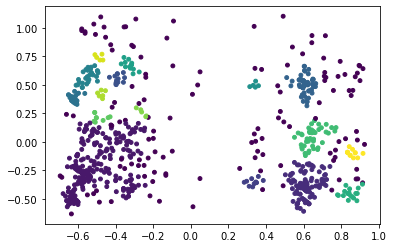

In [140]:
pt.scatter(b[0], b[1], c=b['DBSCAN_opt_labels'],s=15)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(b, b['DBSCAN_opt_labels']))

In [142]:
final_data=pd.DataFrame({'Models':['k_Means Clustering','K_Means_clustering(With Reduce Data)','Agglomerative Hierarchical','Agglomerative Hierarchical(With Reduce Data)','DBSCAN','DBSCAN(With Reduce Data)'],
                        'Silhouette_Score':[score_2,score3,A_S,Hc_R_S,score4,score6]})

In [143]:
final_data

,Models,Silhouette_Score
0,k_Means Clustering,0.170742
1,K_Means_clustering(With Reduce Data),0.572994
2,Agglomerative Hierarchical,0.197955
3,Agglomerative Hierarchical(With Reduce Data),0.578961
4,DBSCAN,29.070000
5,DBSCAN(With Reduce Data),77.110000


In [144]:
final_data2=pd.DataFrame({'Models':['k_Means Clustering','K_Means_clustering(With Reduce Data)','Agglomerative Hierarchical','Agglomerative Hierarchical(With Reduce Data)','DBSCAN','DBSCAN(With Reduce Data)'],
                        'Silhouette_Score':[17,57,19,57,29,77]})

In [145]:
final_data2

,Models,Silhouette_Score
0,k_Means Clustering,17
1,K_Means_clustering(With Reduce Data),57
2,Agglomerative Hierarchical,19
3,Agglomerative Hierarchical(With Reduce Data),57
4,DBSCAN,29
5,DBSCAN(With Reduce Data),77


# COnclusion :- dbscan is the best model to solve this model